In [ ]:
import pandas as pd 


df_origin=pd.read_csv('C:/Users/asma.moujjane/Desktop/data/train.csv', sep=',', error_bad_lines=True)
df_origin.shape


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd #Analysis 
import matplotlib.pyplot as plt #Visulization
import seaborn as sns #Visulization
import numpy as np #Analysis 
from scipy.stats import norm #Analysis 
from sklearn.preprocessing import StandardScaler #Analysis 
from scipy import stats #Analysis 
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
df = pd.DataFrame(df_origin)
        

# Exploration du data 

In [ ]:
df.describe()

In [ ]:
#variables numériques
i=0
for col in df.columns:
    if (df[col].dtype != 'O') :
        print(col)
        i=i+1
        
print(i)


In [ ]:
#variables object
i=0
for col in df.columns:
    if (df[col].dtype == 'O') :
        print(col)
        i=i+1
        
print(i)


In [ ]:
#descréption de la variable cible
df['SalePrice'].describe()

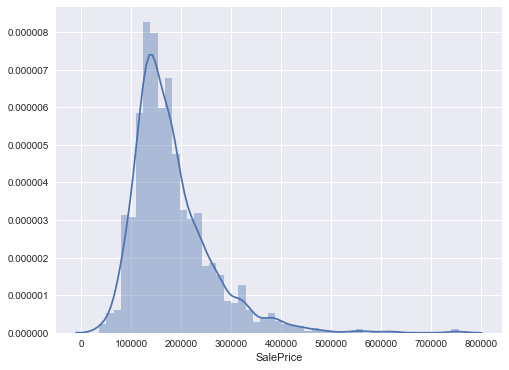

In [368]:
#histogram
f, ax = plt.subplots(figsize=(8, 6))
sns.distplot(df['SalePrice'])

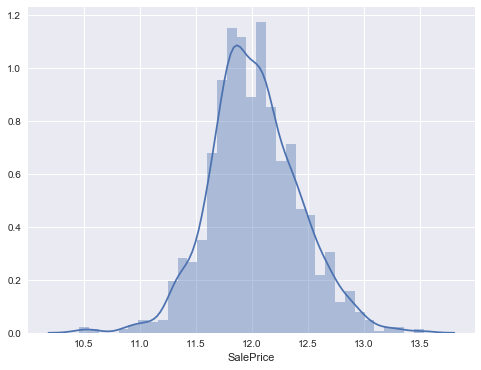

In [369]:
# transformer la variable SalePrice  (distribution normale)
y = df['SalePrice']
y_transformed = np.log(y)
f, ax = plt.subplots(figsize=(8, 6))
sns.distplot(y_transformed)

## Relation des variables

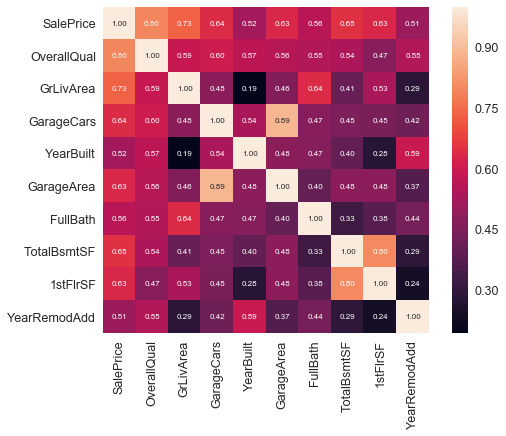

In [370]:

k = 10 #number of variables for heatmap
corrmat = df.corr(method='spearman') # correlation
cols = corrmat.nlargest(k, 'SalePrice').index # nlargest : Return this many descending sorted values
cm = np.corrcoef(df[cols].values.T) # correlation 
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(8, 6))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 8}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

les top 10 variables les plus corrélées avec SalePrice:

OverallQual : Overall material and finish quality
GrLivArea : Above grade (ground : the portion of a home that is above the ground) living area square feet
GarageCars : Size of garage in car capacity
GarageArea : Size of garage in square feet
TotalBsmtSF : Total square feet of basement area (지하실 the lowermost portion of a structure partly or wholly below ground level; often used for storage)
1stFlrSF : First Floor square feet
FullBath : Full bathrooms above grade
TotRmsAbvGrd : Total rooms above grade (does not include bathrooms)
YearBuilt : Original construction date

On remarque aussi que:
'totalBsmtSF 'et' 1stFlrSF 'sont fortement corrélés
'TotRmsAbvGrd' et 'GrLivArea' sont fortement corrélés
'GarageCars' et 'GarageArea' sont fortement corrélés
'GarageYrBlt' et 'YearBuilt' sont fortement corrélés
'TotRmsAbvGrd' et 'GrLivArea' sont fortement corrélés

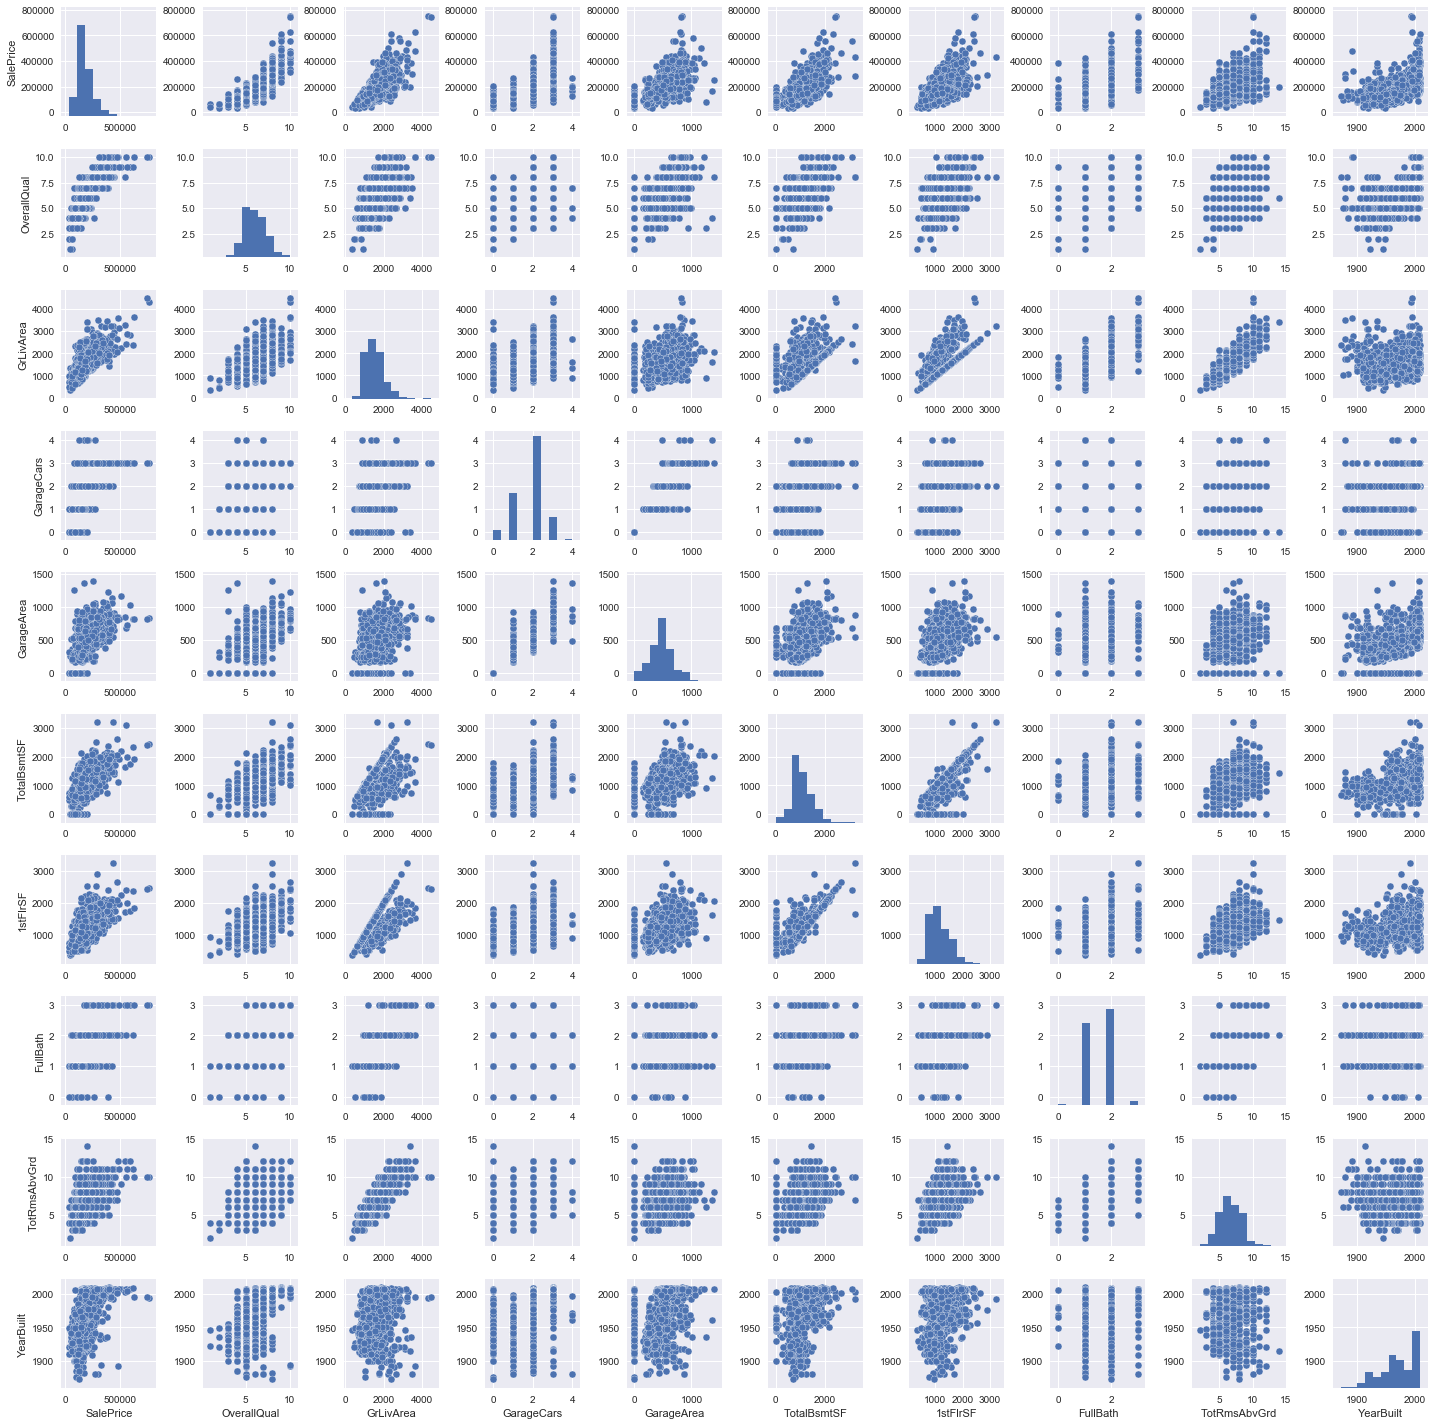

In [371]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath','TotRmsAbvGrd','YearBuilt']
sns.pairplot(df[cols], size = 2)
plt.show();

## les valeurs abberantes

In [ ]:
df.drop(df[df['TotalBsmtSF'] > 5000].index,inplace = True)
df.drop(df[df['1stFlrSF'] > 4000].index,inplace = True)
df.drop(df[(df['GrLivArea'] > 4000) & (df['SalePrice']<300000)].index,inplace = True)
df.shape


In [ ]:
plt.figure(figsize=(7,5))
plt.scatter(x = df.TotalBsmtSF,y = df.SalePrice)
plt.title('TotalBsmtSF', size = 15)
plt.figure(figsize=(7,5))
plt.scatter(x = df['1stFlrSF'],y = df.SalePrice)
plt.title('1stFlrSF', size = 15)
plt.figure(figsize=(7,5))
plt.scatter(x =df.GrLivArea,y =df.SalePrice)
plt.title('GrLivArea', size = 15)


## Supprimer les colonnes non significative

In [ ]:
df.drop(['Id','MSSubClass','Street','Alley','Utilities','Condition2','MSZoning'],inplace=True,axis=1)

## Les valeurs manquantes

In [ ]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

In [ ]:
#histogram
#missing_data = missing_data.head(20)
percent_data = percent.head(20)
percent_data.plot(kind="bar", figsize = (8,6), fontsize = 10)
plt.xlabel("Columns", fontsize = 20)
plt.ylabel("Count", fontsize = 20)
plt.title("Total Missing Value (%)", fontsize = 20)

In [ ]:
# remplacer les null
for col in df.columns:
    if (df[col].dtype != 'O') :
        df[col]=df[col].fillna(df[col].mean)
    if (df[col].dtype == 'O') :
        df[col]=df[col].fillna(str('nan'))


In [ ]:
#s'assurer qu'il n y a plus de valeurs manquantes
df.isnull().sum()

In [ ]:

# label encoding 


from sklearn.preprocessing import LabelEncoder

for col in df.columns:
    if (df[col].dtype == 'O') :
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))

## Sélection des variables

In [ ]:
Xs = df.drop(['SalePrice'],axis=1)
y = df['SalePrice']
clfs = RandomForestRegressor(bootstrap=False,
 max_depth=None,
 max_features='sqrt',
 min_samples_leaf= 1,
 min_samples_split= 2,
 n_estimators= 400)
clfs.fit(Xs, y)

In [ ]:
print(clfs.feature_importances_)

Index(['MiscFeature', 'MiscVal', '3SsnPorch', 'Heating', 'LowQualFinSF',
       'Electrical', 'PoolArea', 'PoolQC', 'BsmtHalfBath', 'BsmtCond',
       'Condition1', 'RoofMatl', 'Fence', 'ExterCond', 'Functional',
       'BsmtFinType2', 'KitchenAbvGr', 'PavedDrive', 'BsmtFinSF2',
       'EnclosedPorch', 'GarageQual', 'GarageCond', 'LandSlope', 'LandContour',
       'SaleType', 'LotConfig', 'ScreenPorch', 'BldgType', 'LotShape',
       'MasVnrType', 'CentralAir', 'YrSold', 'RoofStyle', 'BsmtFullBath',
       'SaleCondition', 'Exterior1st', 'Exterior2nd', 'BsmtFinType1',
       'BsmtExposure', 'MoSold', 'HouseStyle', 'BedroomAbvGr', 'OverallCond',
       'HalfBath', 'Foundation', 'MasVnrArea', 'HeatingQC', 'WoodDeckSF',
       'BsmtUnfSF', 'Neighborhood', 'LotFrontage', 'OpenPorchSF',
       'GarageYrBlt', 'GarageType', 'FireplaceQu', 'Fireplaces',
       'GarageFinish', 'LotArea', 'TotRmsAbvGrd', 'YearRemodAdd', '2ndFlrSF',
       'FullBath', 'BsmtFinSF1', 'KitchenQual', 'YearBuilt', 'Ga

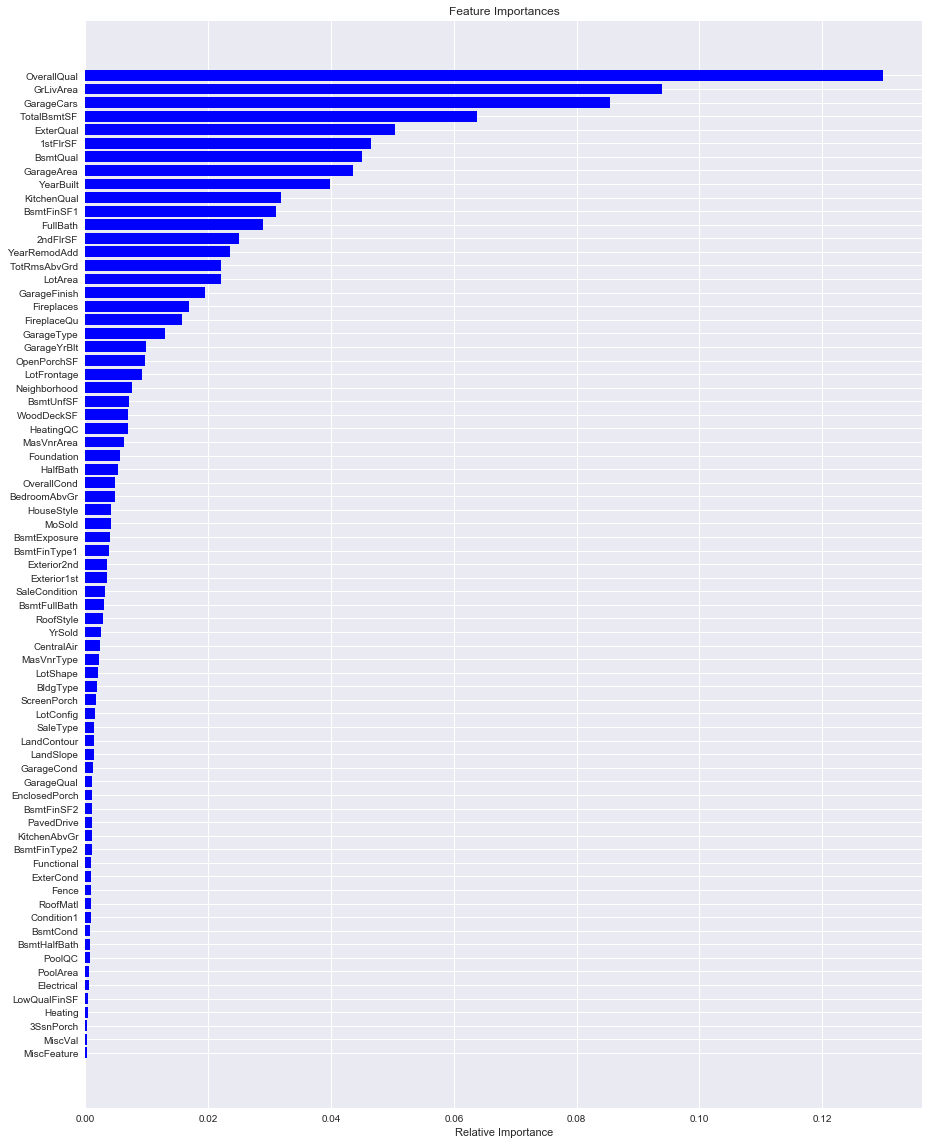

In [372]:
# Plot features by importance (feature coefficient in the model)
features=df.columns
importances = clfs.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(15,20))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
print( features[indices])
    
    



# Tester les modèles 

In [392]:


# selection arbitraire des colonnes
# check for NaN
cols = [ 'BsmtFinType2', 'KitchenAbvGr', 'PavedDrive', 'BsmtFinSF2',
       'EnclosedPorch', 'GarageQual', 'GarageCond', 'LandSlope', 'LandContour',
       'SaleType', 'LotConfig', 'ScreenPorch', 'BldgType', 'LotShape',
       'MasVnrType', 'CentralAir', 'YrSold', 'RoofStyle', 'BsmtFullBath',
       'SaleCondition', 'Exterior1st', 'Exterior2nd', 'BsmtFinType1',
       'BsmtExposure', 'MoSold', 'HouseStyle', 'BedroomAbvGr', 'OverallCond',
       'HalfBath', 'Foundation', 'MasVnrArea', 'HeatingQC', 'WoodDeckSF',
       'BsmtUnfSF', 'Neighborhood', 'LotFrontage', 'OpenPorchSF',
       'GarageYrBlt', 'GarageType', 'FireplaceQu', 'Fireplaces',
       'GarageFinish', 'LotArea', 'TotRmsAbvGrd', 'YearRemodAdd', '2ndFlrSF',
       'FullBath', 'BsmtFinSF1', 'KitchenQual', 'YearBuilt', 'GarageArea',
       'BsmtQual', '1stFlrSF', 'ExterQual', 'TotalBsmtSF', 'GarageCars',
       'GrLivArea', 'OverallQual'
  ]



# pas de null values dans ces colonnes
X = df[cols]
y = df['SalePrice']

# split train test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
    test_size=0.3,
    random_state=2)


## Random forest

In [393]:
#Reseach grid

from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, 
                     rf_random.best_params_          verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

In [ ]:
rf_random.best_params_

In [394]:


clf = RandomForestRegressor(bootstrap=False,
 max_depth=None,
 max_features='sqrt',
 min_samples_leaf= 1,
 min_samples_split= 2,
 n_estimators= 400)
clf.fit(X_train, y_train)
print(clf)
yhat_test1 = clf.predict(X_test)
yhat_train1 = clf.predict(X_train)



RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)


In [395]:
# metric de scoring

def log_rmse(yhat, ytrue):
    return np.sqrt(mean_squared_error ( np.log(yhat), np.log(ytrue) ))
print("\n -- RMSE test {:.4f}".format(log_rmse(y_test, yhat_test)  ))
print("\n -- RMSE train {:.4f}".format(log_rmse(y_train, yhat_train)))


 -- RMSE test 0.1281

 -- RMSE train 0.0691


## lineair regression

In [396]:
 import statsmodels.api as sm

    
model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X)

In [397]:
yhat_test2 = model.predict(X_test)
yhat_train2 =model.predict(X_train)

In [398]:
# metric de scoring

def log_rmse(yhat, ytrue):
    return np.sqrt(mean_squared_error ( np.log(yhat), np.log(ytrue) ))
print("\n -- RMSE test {:.4f}".format(log_rmse(y_test, yhat_test)  ))
print("\n -- RMSE train {:.4f}".format(log_rmse(y_train, yhat_train)))


 -- RMSE test 0.1281

 -- RMSE train 0.0691


## SGD

In [399]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

In [400]:
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
sgd = ensemble.GradientBoostingRegressor(**params)

sgd.fit(X_train, y_train)
mse = mean_squared_error(y_test, sgd.predict(X_test))
print("MSE: %.4f" % mse)


MSE: 717324558.7876


In [401]:
# metric de scoring
yhat_test3 = sgd.predict(X_test)
yhat_train3 = sgd.predict(X_train)
def log_rmse(yhat, ytrue):
    return np.sqrt(mean_squared_error ( np.log(yhat), np.log(ytrue) ))
print("\n -- RMSE test {:.4f}".format(log_rmse(y_test, yhat_test3)  ))
print("\n -- RMSE train {:.4f}".format(log_rmse(y_train, yhat_train3)))


 -- RMSE test 0.1400

 -- RMSE train 0.0801


## SVM

In [383]:
from sklearn import svm
svm = svm.LinearSVC()
svm.fit(X_train, y_train) 

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [384]:

mse = mean_squared_error(y_test, svm.predict(X_test))
print("MSE: %.4f" % mse)

MSE: 7463623453.3767


In [385]:
# metric de scoring
yhat_test4 = svm.predict(X_test)
yhat_train4 = svm.predict(X_train)
def log_rmse(yhat, ytrue):
    return np.sqrt(mean_squared_error ( np.log(yhat), np.log(ytrue) ))
print("\n -- RMSE test {:.4f}".format(log_rmse(y_test, yhat_test4)  ))
print("\n -- RMSE train {:.4f}".format(log_rmse(y_train, yhat_train4)))


 -- RMSE test 0.4102

 -- RMSE train 0.3961


## Combinaison des trois modèles: Random forest+SGD+linear regresion

In [402]:
yhat_test = (yhat_test1+yhat_test2+yhat_test3)/3
yhat_train =(yhat_train1+yhat_train2+yhat_train3)/3

In [403]:
# metric de scoring

def log_rmse(yhat, ytrue):
    return np.sqrt(mean_squared_error ( np.log(yhat), np.log(ytrue) ))
print("\n -- RMSE test {:.4f}".format(log_rmse(y_test, yhat_test)  ))
print("\n -- RMSE train {:.4f}".format(log_rmse(y_train, yhat_train)))


 -- RMSE test 0.1279

 -- RMSE train 0.0691


In [404]:
vdf=pd.read_csv('C:/Users/asma.moujjane/Desktop/data/test.csv', sep=',', error_bad_lines=True)

vdf.drop(['Id','MSSubClass','Street','Alley','Utilities','Condition2','MSZoning'],inplace=True,axis=1)

In [406]:
# remplacer les null
for col in vdf.columns:
    if (vdf[col].dtype != 'O') :
        vdf[col]=vdf[col].fillna(vdf[col].mean)
    if (vdf[col].dtype == 'O') :
        vdf[col]=vdf[col].fillna(str('nan'))
# label encoding 


from sklearn.preprocessing import LabelEncoder

for col in vdf.columns:
    if (vdf[col].dtype == 'O') :
        le = LabelEncoder()
        vdf[col] = le.fit_transform(vdf[col].astype(str))

In [407]:
# a ce niveau appliquer les memes tranformations sur X_valid

X_valid = pd.DataFrame(vdf[cols])

y_valid = (clf.predict(X_valid)+model.predict(X_valid)+sgd.predict(X_valid))/2

In [409]:
  # construire la dataframe de resultats
    
results = pd.DataFrame(columns = ['Id', 'SalePrice'])

# Kaggle veut que la colonne index commence par 1461
results['Id'] = X_valid.index + 1461

results['SalePrice'] = y_valid

# ecrire le resultats dans le fichier csv
results.to_csv("submission.csv", index = False)